## Topic Analysis Bitcoin Tweets

In [36]:
import pandas as pd
import plotly.express as px
import joblib
from functions.tweets_tokenization import \
    tokenize_tweets, \
    dictionary_tweets, \
    bow_tweets, train_bow_tweets

from models.topic_analisis.mod_01_tweets_topics import get_topic_tweets_df

### 1. Tweets Tokenization

In [29]:
store_path = '/Users/hpp/PycharmProjects/tfm_hugopobil/data/sampled_data'
save_path = '/Users/hpp/PycharmProjects/tfm_hugopobil/data/model_data'

In [30]:
# Import tha data, sample data V3
tweets = pd.read_csv(f'{store_path}/tweets_nlp_modelling_v3.csv')
# This data is imported from the NLP modelling notebook, which processes and transforms the tweets
print(tweets.shape)
tweets.head()

(20565, 8)


,date_clean,tweets,cleaned_tweets,crypto_sentiment,subjectivity,polarity,sentiment,target
0,2021-02-06,"""Will Institutional Investment Keep Pouring In...",Will Institutional Investment Keep Pouring Int...,positive,0.0,0.0,positive,True
1,2021-02-06,BTC Bitcoin You know where the WSB money is g...,BTC Bitcoin You know WSB money going WallStree...,positive,0.0,0.0,positive,True
2,2021-02-06,"🔼🔼 ₿1 = $38,868 (00:56 UTC)\n$BTC prices conti...",UTC BTC price continue rise Change since midni...,positive,0.0,0.0,positive,True
3,2021-02-06,BTC Bitcoin All the way up! 🚀 🚀 💵 💵 /xVyLbbWRiu,BTC Bitcoin All way xVyLbbWRiu,positive,0.0,0.0,positive,True
4,2021-02-06,Keep going BTC bitcoin,Keep going BTC bitcoin,positive,0.0,0.0,positive,True


In [5]:
tweets['tokens'] = tokenize_tweets(tweets.cleaned_tweets.to_list(), lang='en')

words_to_delete = ['Bitcoin', 'bitcoin', 'btc', 'ada']

for word in words_to_delete:
    tweets['tokens'] = tweets.tokens.apply(lambda x: [i for i in x if i != word])

tweets['tokens']

0        [institutional, investment, keep, pouring, ehs...
1        [know, wsb, money, going, wallstreetbets, gme,...
2        [utc, price, continue, rise, change, since, mi...
3                                        [way, xvylbbwriu]
4                                            [keep, going]
                               ...                        
20560    [let, honest, watching, video, please, tell, b...
20561    [got, hashing, alot, onboard, super, excited, ...
20562              [surprise, people, willing, spend, nft]
20563    [bnb, dumped, current, price, want, buy, dip, ...
20564    [first, giveaway, nft, dogedash, subscriber, f...
Name: tokens, Length: 20565, dtype: object

#### 1.1 Dictionary

In [6]:
# Create the dictionary
dictionary = dictionary_tweets(tweets['tokens'])

# Visualize the freq for each of the tokens, in descending order
words_to_show = 20
tf = {dictionary[word_id]:freq for word_id, freq in dictionary.dfs.items()}
sorted(tf.items(), key=lambda x: x[1], reverse=True)[0:words_to_show]

[('crypto', 5836),
 ('cryptocurrency', 3401),
 ('eth', 3154),
 ('ethereum', 2330),
 ('price', 2078),
 ('binance', 1845),
 ('bnb', 1748),
 ('blockchain', 1741),
 ('project', 1724),
 ('bsc', 1562),
 ('airdrop', 1312),
 ('doge', 1236),
 ('buy', 1235),
 ('nft', 1031),
 ('xrp', 1006),
 ('defi', 992),
 ('get', 976),
 ('market', 942),
 ('new', 909),
 ('trading', 905)]

#### 1.1 BOW and X

In [7]:
%%time
X = bow_tweets(tweets['tokens'], dictionary)
X_train = train_bow_tweets(X[0], min_n_words=4)

CPU times: user 4.5 s, sys: 2.11 s, total: 6.61 s
Wall time: 7.73 s


### 2. Biterm Model

At the moment the models need more computational power than my personal computer can provide. The models have been calculated using the same data and uploades from external.

In [ ]:
# bob = bag_biterms(X)

In [ ]:
# bob_df = pd.DataFrame((list(map(str, bob))), columns=['biterms']).groupby(['biterms']).size().reset_index(name='counts').sort_values('counts', ascending=0)
# bob_df['biterm_text'] = bob_df['biterms'].apply(lambda x: x.strip(' []').split(' '))

In [ ]:
# bob_df['biterm_text'] = bob_df['biterm_text'].apply(lambda x: f'{dictionary[int(x[0])]},{dictionary[int(x[1])]}')
# ax =  bob_df[0:40].plot.bar(x='biterm_text' ,y='counts', figsize=(10,5))
# plt.show()

## Topic Analysis

In [8]:
n_topics = 20

In [9]:
name_tmpl = 'btm_em_tfm'
n_topics_list = [5, 10, 15, 20]
model_map_fn = {
    n_topics: f'/Users/hpp/PycharmProjects/tfm_hugopobil/models/topic_analisis/{name_tmpl}{n_topics}.joblib'
    for n_topics in n_topics_list
}

Load the model:

In [10]:
btm = joblib.load(model_map_fn[n_topics])

In [11]:
tweets = tweets.reset_index()

In [12]:
btm_topics_df, tweets_df = get_topic_tweets_df(btm, X[0], tweets, dictionary)

Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...

In [35]:
btm_topics_df.sort_values(by='topic_id')

,title,tweets_count,tweets_theta_count,topic_no
topic_id,,,,
0,"mechanism,proof,shock,library,alt,ranoq,stake,...",49,113.809634,15
1,"unbelievable,jque,shock,xr,mark,highs,bxur,wmz...",184,248.500417,7
2,"rnigct,ridge,epqbqug,wmz,shock,stake,test,jbbm...",83,84.277854,18
3,"shock,ren,heard,unbelievable,gi,create,start,s...",855,610.359982,1
4,"ranoq,shock,scammer,stake,wmz,falls,unbelievab...",91,175.665429,11
5,"cake,scammer,something,rzpx,reeuxn,zebnvdncnr,...",36,68.152677,19
6,"gfnrbaz,unbelievable,stake,beat,decentra,someb...",35,76.333275,17
7,"shock,stake,qen,lmfao,ncvvfmlk,ranoq,coinbase,...",506,416.582270,3
8,"qcpgvl,naija,cmg,wbubqwrswn,jppxsavwdr,highs,i...",138,156.460783,13


### Topic Visualization

EXECUTE ALL FROM HERE TO CHANGE TOPIC

In [87]:
topic_no = 10

In [88]:
tweets_df

,level_0,index,date_clean,tweets,cleaned_tweets,crypto_sentiment,subjectivity,polarity,sentiment,target,tokens,topic_id,topic_prob
0,0,0,2021-02-06,"""Will Institutional Investment Keep Pouring In...",Will Institutional Investment Keep Pouring Int...,positive,0.000000,0.000000,positive,True,"[institutional, investment, keep, pouring, ehs...",3,0.651158
1,1,1,2021-02-06,BTC Bitcoin You know where the WSB money is g...,BTC Bitcoin You know WSB money going WallStree...,positive,0.000000,0.000000,positive,True,"[know, wsb, money, going, wallstreetbets, gme,...",7,0.674155
2,2,2,2021-02-06,"🔼🔼 ₿1 = $38,868 (00:56 UTC)\n$BTC prices conti...",UTC BTC price continue rise Change since midni...,positive,0.000000,0.000000,positive,True,"[utc, price, continue, rise, change, since, mi...",10,0.607651
5,5,5,2021-02-06,Bitcoin rocks and shocks. Unbelievable what ha...,Bitcoin rock shock Unbelievable happens moment...,positive,0.634615,-0.163462,negative,False,"[rock, shock, unbelievable, happens, moment, l...",14,0.443770
6,6,6,2021-02-06,No bullshit. This is bullish shit! BTC Bitcoin...,No bullshit This bullish shit BTC Bitcoin BTC ...,positive,0.800000,-0.200000,negative,False,"[bullshit, bullish, shit, ncvvfmlk]",1,0.618830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,20543,20543,2022-01-22,bluesparrow isn't it amazing?\n• Daily &amp; ...,bluesparrow amazing Daily amp weekly amp month...,positive,0.633333,0.400000,neutral,False,"[bluesparrow, amazing, daily, amp, weekly, amp...",7,0.315601
20548,20548,20548,2022-01-22,btc death rat bounce,btc death rat bounce,positive,0.000000,0.000000,positive,True,"[death, rat, bounce]",14,0.373443
20556,20556,20556,2022-01-22,ETH - long alert 💵💰\n\nExchange : FTX\nMar...,ETH long alert Exchange FTX Market ETH PERP Vo...,positive,0.450000,0.043182,neutral,False,"[eth, long, alert, exchange, ftx, market, eth,...",3,0.317318
20562,20562,20562,2022-01-22,What surprises me most is that people are will...,What surprise people willing spend NFT Bitcoin,positive,0.750000,0.250000,neutral,False,"[surprise, people, willing, spend, nft]",7,0.349848


In [31]:
# Daily counts
def get_daily_counts_2(topic_no, topics, tweets):
    topic_id = topics[topics.topic_no == topic_no].index[0]
    daily_counts = (
        tweets[tweets.topic_id == topic_id]
            .pipe(lambda df: df.groupby(df.date_clean)['index'].count())
    )
    return daily_counts

In [32]:
daily_counts = get_daily_counts_2(topic_no, btm_topics_df, tweets_df)

<AxesSubplot:xlabel='index'>

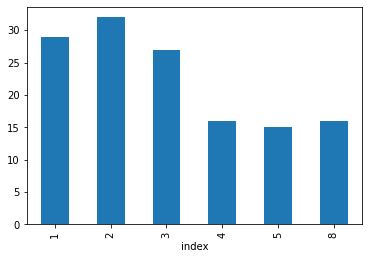

In [33]:
daily_counts.groupby(daily_counts).sum().plot.bar()

In [37]:
def plot_daily_counts_2(topic_no, topics, tweets):
    daily_counts = get_daily_counts_2(topic_no, topics, tweets)
    fig = px.line(daily_counts)
    return fig

In [38]:
plot_daily_counts_2(11, btm_topics_df, tweets_df)